# vBrand algo interview exercise

## Dear candidate,

This is a vision data task taken.

The data is an object detection dictionary based summary analysis of a video from vB engine.

data format is assembled from images and their related ROIs.

Each ROI is described by its bounds, class name and confidence score.

Please fill the following sub-tasks:

#### 1. get the data from data.result

#### 2. extract features for all ROIs in the video

#### 3. perform clustering on ROIs

#### 4. evaluate clustering results

#### 5. visualize clustering results

In [2]:
import json
import sklearn
import cv2
import wget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [3]:
with open("data.result") as f:
    data = json.loads(f.read())

In [3]:
df = pd.DataFrame(data["data"]["timebased_classes_found"])
df

,flat_tag_list,imgurl,classes,time
0,"[new_class (0.7944), new_class (0.7913), new_c...",https://videosframes.blob.core.windows.net/156...,"[{'class_name': 'new_class (0.6844)', 'blur': ...",0:00:00.0
1,"[new_class (0.8154), new_class (0.7922), new_c...",https://videosframes.blob.core.windows.net/156...,"[{'class_name': 'new_class (0.6573)', 'blur': ...",0:00:01.0
2,"[new_class (0.8178), new_class (0.8062), new_c...",https://videosframes.blob.core.windows.net/156...,"[{'class_name': 'new_class (0.675)', 'blur': 0...",0:00:02.0
3,"[new_class (0.8219), new_class (0.7853), new_c...",https://videosframes.blob.core.windows.net/156...,"[{'class_name': 'new_class (0.6154)', 'blur': ...",0:00:03.0
4,"[new_class (0.7863), new_class (0.7596), new_c...",https://videosframes.blob.core.windows.net/156...,"[{'class_name': 'new_class (0.5201)', 'blur': ...",0:00:04.0
...,...,...,...,...
129,"[new_class (0.7918), new_class (0.79), new_cla...",https://videosframes.blob.core.windows.net/156...,"[{'class_name': 'new_class (0.79)', 'blur': 1,...",0:02:19.0
130,"[new_class (0.7926), new_class (0.7044), new_c...",https://videosframes.blob.core.windows.net/156...,"[{'class_name': 'new_class (0.6694)', 'blur': ...",0:02:20.0
131,"[new_class (0.9558), new_class (0.8769), new_c...",https://videosframes.blob.core.windows.net/156...,"[{'class_name': 'new_class (0.7141)', 'blur': ...",0:02:21.0
132,"[new_class (0.8539), new_class (0.853), new_cl...",https://videosframes.blob.core.windows.net/156...,"[{'class_name': 'new_class (0.6708)', 'blur': ...",0:02:22.0


In [4]:
cd data/

/Users/yak/PycharmProjects/code/vb_inter/data


In [6]:
for obj in data["data"]["timebased_classes_found"]:
    print(obj["imgurl"])
#     wget.download(obj["imgurl"])

https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000001.jpg
https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000011.jpg
https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000021.jpg
https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000031.jpg
https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000041.jpg
https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000051.jpg
https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000061.jpg
https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000071.jpg
https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000081.jpg
https://videosframes.blob.core.windows.net/1561569287504/cologne-1561569287504-img0000091.jpg
https://videosframes.blob.core.windows.net/1561569287504/col

In [7]:
obj["classes"]

[{'class_name': 'new_class (0.6882)',
  'blur': 0.94,
  'roi': [8, 465, 58, 47],
  'id': 'ba5134952_889',
  'tr_id': 5624,
  'c': 13,
  'c_inner_idx': 20},
 {'class_name': 'new_class (0.669)',
  'blur': 0.95,
  'roi': [13, 240, 85, 56],
  'id': 'ba5134952_890',
  'tr_id': 5814,
  'c': 153,
  'c_inner_idx': 1},
 {'class_name': 'new_class (0.6555)',
  'blur': 1,
  'roi': [18, 197, 78, 52],
  'id': 'ba5134952_891',
  'tr_id': 5926,
  'c': 130,
  'c_inner_idx': 18},
 {'class_name': 'new_class (0.7015)',
  'blur': 1,
  'roi': [24, 287, 77, 51],
  'id': 'ba5134952_892',
  'tr_id': 5925,
  'c': 244,
  'c_inner_idx': 19},
 {'class_name': 'new_class (0.7671)',
  'blur': 1,
  'roi': [25, 369, 70, 54],
  'id': 'ba5134952_893',
  'tr_id': 5755,
  'c': 130,
  'c_inner_idx': 16},
 {'class_name': 'new_class (0.5525)',
  'blur': 1,
  'roi': [30, 325, 72, 55],
  'id': 'ba5134952_894',
  'tr_id': 5930,
  'c': 130,
  'c_inner_idx': 19},
 {'class_name': 'new_class (0.773)',
  'blur': 0.75,
  'roi': [52, 4

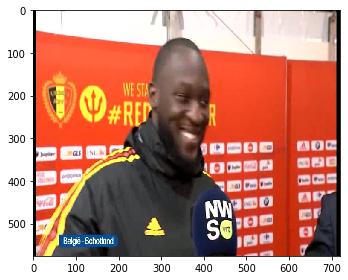

In [8]:
im_fn = "/Users/yak/Downloads/cologne-1561569287504-img0001411.jpg"
image = imread(im_fn)
imshow(image)

In [19]:
image.shape

(576, 720, 3)

In [9]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

In [10]:
pic_one = "/Users/yak/Downloads/cologne-1561569287504-img0001411.jpg"
pic_two = "/Users/yak/Downloads/cologne-1561569287504-img0000081.jpg"

In [25]:
# Load the pretrained model
model = models.resnet18(pretrained=True)
# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

In [26]:
# Set model to evaluation mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

/usr/local/lib/python3.7/site-packages/torchvision/transforms/transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [33]:
def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data)
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding

In [5]:
pic_one = "/Users/yak/Downloads/cat.jpg"

In [7]:
from img2vec_pytorch import Img2Vec
from PIL import Image

# Initialize Img2Vec with GPU
img2vec = Img2Vec(cuda=False)

# Read in an image
img = Image.open(pic_one)
# Get a vector from img2vec, returned as a torch FloatTensor
vec = img2vec.get_vec(img, tensor=True)

In [9]:
np.array(vec).squeeze()

array([1.22520048e-02, 9.86658216e-01, 1.03898764e+00, 7.76085675e-01,
       1.41603634e-01, 1.37314022e-01, 1.36463687e-01, 1.28197983e-01,
       1.07222557e+00, 3.80179167e-01, 2.68474007e+00, 7.83414483e-01,
       3.09984058e-01, 2.66830057e-01, 3.17809701e-01, 6.26104951e-01,
       1.65388152e-01, 3.20775092e-01, 9.52662453e-02, 1.15576494e+00,
       9.91614878e-01, 1.36325228e+00, 4.20552820e-01, 1.37864244e+00,
       3.52820337e-01, 3.81926566e-01, 1.34898394e-01, 5.45089543e-01,
       1.58865616e-01, 4.62482184e-01, 1.94254160e-01, 8.24227333e-02,
       8.02269757e-01, 1.06790155e-01, 1.24505557e-01, 2.03673169e-01,
       7.87790954e-01, 2.14767724e-01, 1.16431403e+00, 5.23912251e-01,
       2.61919200e-01, 2.22309500e-01, 2.21315444e-01, 8.43661547e-01,
       1.16666329e+00, 2.85595041e-02, 9.07177269e-01, 2.66846013e+00,
       6.39875829e-01, 1.32322454e+00, 1.99460879e-01, 6.62143767e-01,
       8.75031590e-01, 3.35866332e-01, 9.05564129e-01, 1.33878314e+00,
      